# UNESCO Mini Report

This notebook will introduce the features of summarization. Their is a lot of report and lot enough time too read them all.\ 

Is for that we create this tool who takes a report in PDF format as input and generate a smaller version of it with only the essential to help the classification.


First of all, let's import our packages:
- `os`: Various interfaces for the operating system
- `sys`: System specific parameters and fonctions
- `metaData`: Fetching informations from raw text and PDF
- `dataExtraction`: Work with pdf and raw data extraction
- `genMiniReport` : Work with transformer for generate summaries
- `Wand` : allow us to display a PDF file in this notebook
- `transformers` : Hugging face's transformer library

In [1]:
import os
import sys

import metaData
import dataExtraction
import TrQuestions
import TrSentymentAnalysis
import genMiniReport

from wand.image import Image as WImage

from transformers import pipeline

**Now let's load and parse our report!**
- `dataExtraction.PDFToText(path)`: convert pdf to raw text
- `metaData.getInfo(data, from_text=bool)`: parse raw text to extract usefull informations

In [2]:
report = dataExtraction.PDFToText("exemple_report.pdf")
reportInfos = metaData.getInfo(report, from_text=True)

Let's play with report's data !\
First we will see what informations did we fetch for the part *Pupils' achievements*:

In [3]:
print(reportInfos[8])

THE QUALITY OF SCHOOL SELF-EVALUATIONApproaches to SSE are effectiveThe school has devised school improvement plans for Social Personal and Health Education (SPHEThe school has used the six-step approach in identifying areas of concern and has gathered and analysed data in order to set specific and measurable targetsIt is clear that these targets have been achievedThe school should explore how the SSE process can be used to agreeadvance and document whole-school approaches to teaching and learning among all stakeholdersGiven the dedication and high levels of interest and commitment demonstrated by the teachers the capacity of the school to improve is very gooddifficultiesAppendixSCHOOL RESPONSE TO THE REPORTSubmitted by the Board of ManagementPublished January 


We can see our data fetching worked pretty well. But it's a lot of data and we only have few time\
Let me introduce the summarization !

In [4]:
nlp_sum = pipeline('summarization')
nlp_sum(reportInfos[8])

[{'summary_text': ' The school has devised school improvement plans for Social Personal and Health Education (SPHE) The school should explore how the SSE process can be used to agreeadvance and document whole-school approaches to teaching and learning among all stakeholders . Given the dedication and high levels of interest and commitment demonstrated by the teachers the capacity of the school to improve is very good .'}]

Impressive isn't it ?\
by replicating this method we are now able to generate a new PDF that summarizes all the report's content ! let's see how it look 

Your min_length is set to 56, but you input_length is only 10. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 10. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 72. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


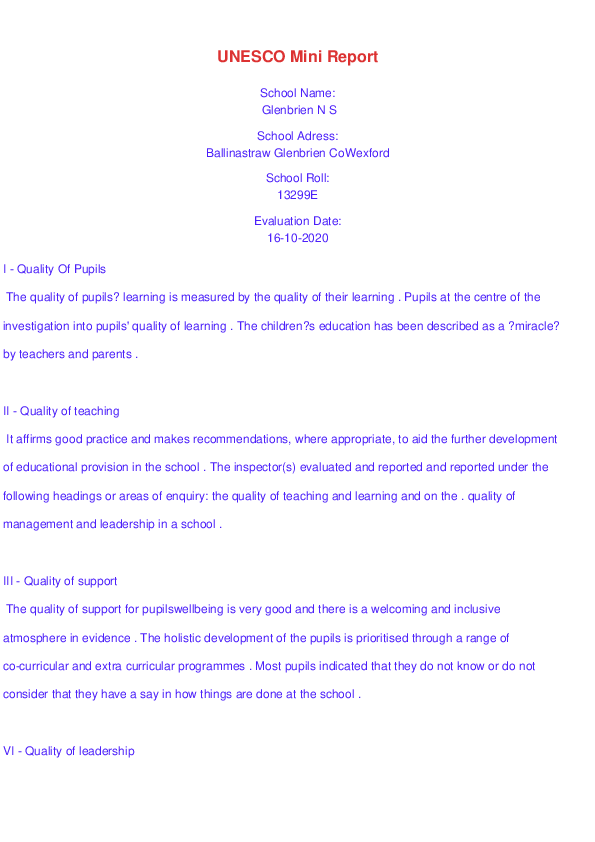

In [5]:
genMiniReport.getMiniReport(reportInfos)

from wand.image import Image as WImage
render = WImage(filename='miniReport.pdf')
render